In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import numpy as np
import pandas as pd

In [14]:
# load data

dataX=pd.read_csv("./data/trainX.csv")
dataA=pd.read_csv("./data/trainA.csv")
dataY=pd.read_csv("./data/trainY.csv")

# remove index

dataX=dataX.values[:,1:]
dataY=dataY.values[:,1:-1]
dataA=dataA.values[:,1:]

In [15]:
np.where(dataA==1)[0]

array([  4,   5,   9,  11,  13,  14,  19,  26,  35,  38,  40,  42,  43,
        44,  45,  49,  51,  53,  54,  61,  63,  64,  67,  69,  72,  73,
        76,  78,  79,  81,  82,  83,  85,  88,  90,  94,  95,  98, 102,
       103, 104, 106, 108, 109, 110, 111, 112, 113, 114, 123, 125, 126,
       128, 130, 133, 135, 139, 141, 143, 146, 147, 150, 159, 162, 167,
       168, 171, 173, 177, 181, 183, 184, 186, 187, 188, 189, 190, 192,
       193, 195, 196, 200, 201, 203, 206, 210, 212, 214, 216, 218, 221,
       223, 226, 227, 230, 233, 238, 240, 243, 244, 254, 255, 260, 263,
       264, 266, 270, 276, 277, 280, 283, 289, 292, 294, 297, 298, 299,
       300, 301, 306, 311, 312, 315, 318, 321, 322, 323, 325, 329, 331,
       332, 333, 336, 338, 343, 346, 348, 350, 352, 354, 357, 358, 359,
       361, 364, 365, 367, 376, 377, 382, 383, 384, 387, 390, 392, 393,
       397, 398, 399, 404, 405, 407, 409, 411, 412, 417, 418, 419, 421,
       429, 433, 434, 439, 441, 448, 449, 450, 451, 457, 459, 46

In [16]:
dataX.shape

(666, 17)

In [17]:
# split cure or not cure

data_CX=dataX[np.where(dataA==1)[0]]
dataNCX=dataX[np.where(dataA!=1)[0]]
data_CY=dataY[np.where(dataA==1)]
dataNCY=dataY[np.where(dataA!=1)]

In [18]:
data_CX

array([[0.82, 0.  , 0.26, ..., 0.82, 0.37, 0.09],
       [0.78, 0.32, 0.62, ..., 0.89, 0.86, 0.32],
       [0.52, 0.03, 0.7 , ..., 0.39, 0.37, 0.95],
       ...,
       [0.41, 0.07, 0.99, ..., 0.09, 0.16, 0.33],
       [0.5 , 0.99, 0.61, ..., 0.73, 0.76, 0.01],
       [0.62, 0.19, 0.51, ..., 0.19, 0.39, 0.17]])

In [19]:
data_CY

array([2.0700e+00, 1.6530e+01, 4.8100e+00, 2.7000e-01, 5.2800e+00,
       1.5000e-01, 3.4210e+01, 4.6730e+01, 3.4000e-01, 2.9000e-01,
       1.7000e-01, 4.7000e-01, 0.0000e+00, 9.0000e-02, 4.9100e+00,
       1.0000e-01, 1.0700e+01, 3.4900e+01, 4.0000e-02, 9.0000e-02,
       1.4000e-01, 7.2400e+00, 1.0000e-01, 9.8000e-01, 0.0000e+00,
       5.6000e+00, 4.6820e+01, 4.6000e-01, 8.7700e+00, 1.3000e-01,
       1.4000e-01, 1.2000e-01, 1.0000e-01, 1.0000e-01, 3.3600e+00,
       4.3000e-01, 6.0000e-02, 1.7000e-01, 1.2000e-01, 1.1700e+00,
       6.2000e-01, 1.9000e-01, 2.3000e-01, 2.3000e-01, 9.8000e-01,
       3.2000e-01, 2.2000e-01, 2.4850e+01, 7.5000e-01, 0.0000e+00,
       2.3700e+00, 3.2000e-01, 1.1000e-01, 2.1000e+00, 8.0000e-02,
       1.0000e-01, 1.4000e-01, 3.3200e+00, 1.0750e+01, 6.1130e+01,
       1.4440e+01, 2.3800e+00, 9.8900e+00, 8.7400e+00, 1.4878e+02,
       5.1000e-01, 1.2400e+00, 2.6000e-01, 9.6900e+00, 1.6800e+00,
       4.3000e+00, 5.5900e+00, 1.0000e+00, 2.0600e+00, 5.8000e

In [20]:
from sklearn.model_selection import train_test_split

train_data_C,test_data_C,train_targets_C,test_targets_C=train_test_split(data_CX,data_CY)
train_dataNC,test_dataNC,train_targetsNC,test_targetsNC=train_test_split(data_CX,data_CY)


In [21]:
mean_C = train_data_C.mean(axis=0)
train_data_C -= mean_C
std_C = train_data_C.std(axis=0)
train_data_C /= std_C

test_data_C -= mean_C
test_data_C /= std_C


meanNC = train_dataNC.mean(axis=0)
train_dataNC -= meanNC
stdNC = train_dataNC.std(axis=0)
train_dataNC /= stdNC

test_dataNC -= meanNC
test_dataNC /= stdNC

In [22]:
from keras import models
from keras import layers

def build_model_C():
    # 동일한 모델을 여러 번 생성할 것이므로 함수를 만들어 사용합니다
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data_C.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
    return model


def build_modelNC():
    # 동일한 모델을 여러 번 생성할 것이므로 함수를 만들어 사용합니다
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_dataNC.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
    return model

def build_model_C_100():
  # 2. 모델의 구조를 BatchNormalization layer를 사용하여 만든다.
  X = tf.keras.layers.Input(shape=[17])
  
  H = tf.keras.layers.Dense(8)(X)
  H = tf.keras.layers.BatchNormalization()(H)
  H = tf.keras.layers.Activation('swish')(H)
  
  H = tf.keras.layers.Dense(8)(H)
  H = tf.keras.layers.BatchNormalization()(H)
  H = tf.keras.layers.Activation('swish')(H)
  
  H = tf.keras.layers.Dense(8)(H)
  H = tf.keras.layers.BatchNormalization()(H)
  H = tf.keras.layers.Activation('swish')(H)
  
  Y = tf.keras.layers.Dense(1)(H)
  model = tf.keras.models.Model(X, Y)
  model.compile(loss='mse', metrics=[tf.keras.metrics.Accuracy()])
  return model

def build_model_NC_100():
  # 2. 모델의 구조를 BatchNormalization layer를 사용하여 만든다.
  X = tf.keras.layers.Input(shape=[17])
  
  H = tf.keras.layers.Dense(8)(X)
  H = tf.keras.layers.BatchNormalization()(H)
  H = tf.keras.layers.Activation('swish')(H)
  
  H = tf.keras.layers.Dense(8)(H)
  H = tf.keras.layers.BatchNormalization()(H)
  H = tf.keras.layers.Activation('swish')(H)
  
  H = tf.keras.layers.Dense(8)(H)
  H = tf.keras.layers.BatchNormalization()(H)
  H = tf.keras.layers.Activation('swish')(H)
  
  Y = tf.keras.layers.Dense(1)(H)
  model = tf.keras.models.Model(X, Y)
  model.compile(loss='mse', metrics=[tf.keras.metrics.Accuracy()])
  return model


In [23]:
import time
start_time = time.time()

In [24]:
# cure

k = 4
num_val_samples = len(train_data_C) // k
num_epochs = 100
all_scores_C = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data_C[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets_C[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data_C[:i * num_val_samples],
         train_data_C[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets_C[:i * num_val_samples],
         train_targets_C[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model_C = build_model_C()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    model_C.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # 검증 세트로 모델 평가
    val_mse, val_mae = model_C.evaluate(val_data, val_targets, verbose=0)
    all_scores_C.append(val_mae)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [25]:
# not cure

k = 4
num_val_samples = len(train_dataNC) // k
num_epochs = 100
all_scoresNC = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_dataNC[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targetsNC[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_dataNC[:i * num_val_samples],
         train_dataNC[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targetsNC[:i * num_val_samples],
         train_targetsNC[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    modelNC = build_modelNC()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    modelNC.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # 검증 세트로 모델 평가
    val_mse, val_mae = modelNC.evaluate(val_data, val_targets, verbose=0)
    all_scoresNC.append(val_mae)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [26]:
elapsed_time = time.time() - start_time
time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

'00:09:00'

In [27]:
all_scores_C,np.mean(all_scores_C)


([1.2929011631011962,
  2.0884763622283935,
  1.9198805713653564,
  1.657959098815918],
 1.739804298877716)

In [28]:
all_scoresNC,np.mean(all_scoresNC)


([5.5326028823852536,
  9.079362926483155,
  7.860736846923828,
  5.6843598937988284],
 7.039265637397766)

In [29]:
from keras import backend as K

# 메모리 해제
K.clear_session()

In [30]:
start_time = time.time()

In [31]:
# cure

num_epochs = 1000
all_mae_histories_C = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data_C[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets_C[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data_C[:i * num_val_samples],
         train_data_C[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets_C[:i * num_val_samples],
         train_targets_C[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model_C = build_model_C()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    history = model_C.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories_C.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [32]:
# not cure

num_epochs = 1000
all_mae_historiesNC = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_dataNC[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targetsNC[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_dataNC[:i * num_val_samples],
         train_dataNC[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targetsNC[:i * num_val_samples],
         train_targetsNC[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    modelNC = build_modelNC()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    history = modelNC.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_historiesNC.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [33]:
elapsed_time = time.time() - start_time
time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

'01:20:16'

In [34]:
average_mae_history_C = [
    np.mean([x[i] for x in all_mae_histories_C]) for i in range(num_epochs)]

average_mae_historyNC = [
    np.mean([x[i] for x in all_mae_historiesNC]) for i in range(num_epochs)]

In [35]:
import matplotlib.pyplot as plt

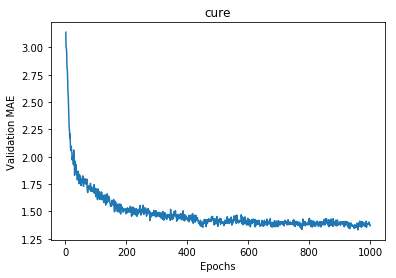

In [36]:
plt.plot(range(1, len(average_mae_history_C) + 1), average_mae_history_C)
plt.title('cure')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

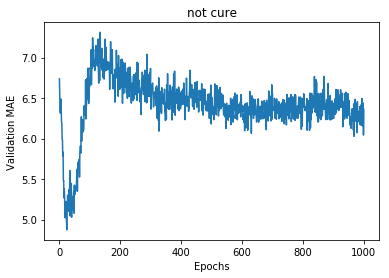

In [37]:
plt.plot(range(1, len(average_mae_historyNC) + 1), average_mae_historyNC)
plt.title('not cure')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

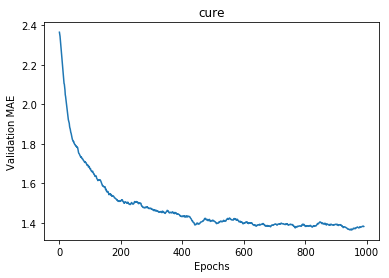

In [38]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history_C = smooth_curve(average_mae_history_C[10:])

plt.plot(range(1, len(smooth_mae_history_C) + 1), smooth_mae_history_C)
plt.title('cure')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

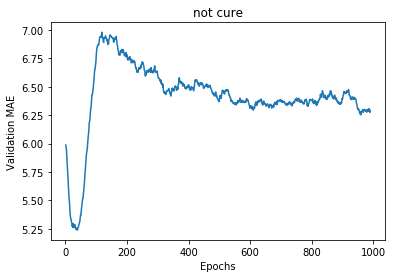

In [39]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_historyNC = smooth_curve(average_mae_historyNC[10:])

plt.plot(range(1, len(smooth_mae_historyNC) + 1), smooth_mae_historyNC)
plt.title('not cure')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

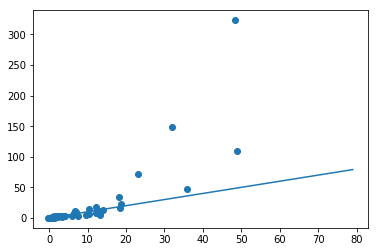

In [40]:
pred_targets=model_C.predict(test_data_C)

plt.scatter(pred_targets,test_targets_C)
plt.plot(np.arange(80),np.arange(80))

### 선형회귀

In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(pred_targets, test_targets_C)

model.coef_, model.intercept_ 

(array([3.4763527], dtype=float32), -7.6987906)

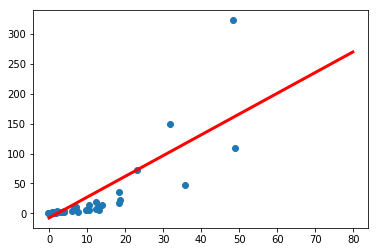

In [42]:
xs = np.arange(0, 80, 0.1)
ys = xs*model.coef_[0] + model.intercept_

plt.scatter(pred_targets,test_targets_C)
plt.plot(xs,ys,'r-',lw=3)

### 2차식 회귀

In [43]:
X = np.c_[pred_targets, pred_targets**2]
y = test_targets_C

model = LinearRegression()
model.fit(X, y)

model.coef_, model.intercept_

(array([0.02294654, 0.08795736], dtype=float32), 0.5454273)

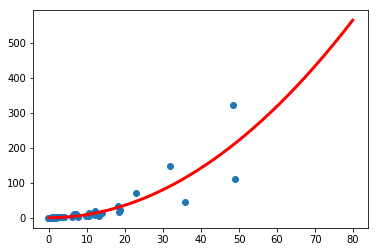

In [44]:
xs = np.arange(0,80,0.1)
ys = xs*model.coef_[0] + (xs**2)*model.coef_[1] + model.intercept_

plt.scatter(pred_targets,test_targets_C)
plt.plot(xs,ys,'r-',lw=3)

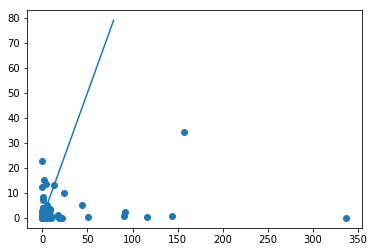

In [45]:
pred_targets=modelNC.predict(test_data_C)

plt.scatter(pred_targets,test_targetsNC)
plt.plot(np.arange(80),np.arange(80))

In [46]:
test_data_C.shape

(67, 17)

In [47]:
train_data_C.shape

(200, 17)

In [48]:
test_data_C[0]

array([-0.84865574,  0.36008528, -1.98620301, -0.90460313,  1.42010076,
        1.76434299, -0.53481187,  0.69488627,  1.71564339,  0.69345402,
       -0.69338692, -0.7166123 ,  0.73266789, -0.51912892,  0.66488498,
        0.88743116,  0.96925362])

In [49]:
time_C=model_C.predict(test_data_C)[0]
timeNC=modelNC.predict(test_data_C)[0]

if time_C > timeNC:
  print('치료하세용')
else:
  print('치료하지 마세용')

print(test_targets_C[0],time_C,timeNC,time_C-timeNC)



치료하지 마세용
72.44 [23.027042] [90.50527] [-67.478226]


In [51]:
import tensorflow as tf

In [52]:
# 2. 모델의 구조를 만듭니다
X = tf.keras.layers.Input(shape=[13])
H = tf.keras.layers.Dense(8, activation='swish')(X)
H = tf.keras.layers.Dense(8, activation='swish')(H)
H = tf.keras.layers.Dense(8, activation='swish')(H)
Y = tf.keras.layers.Dense(1)(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse')

ValueError: Unknown activation function:swish

In [ ]:
# 2. 모델의 구조를 BatchNormalization layer를 사용하여 만든다.
X = tf.keras.layers.Input(shape=[17])

H = tf.keras.layers.Dense(16)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dense(8)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dense(8)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

Y = tf.keras.layers.Dense(1)(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse')

In [ ]:
# 3.데이터로 모델을 학습(FIT)합니다.
model.fit(train_data_C, train_targets_C, epochs=1000)

In [ ]:
# 4. 모델을 이용합니다
print(model.predict(test_data_C))

In [ ]:
# 종속변수 확인
print(test_targets_C)

In [ ]:
# 환자 특성 분포
plt.plot(data_CX, 'o')

In [ ]:
dataX[np.where((dataA == 1) & (dataY <= 100))[0]]

In [ ]:
# 치료받은 사람들 중 생존시간이 100이하인 사람들만 고른다.
dataCX_100 = dataX[np.where((dataA == 1) & (dataY <= 100))[0]]
dataCY_100 = dataY[np.where((dataA == 1) & (dataY <= 100))[0]]

# 치료받지 않은 사람들 중 생존시간이 100이하인 사람들만 고른다.
dataNCX_100 = dataX[np.where((dataA == 0) & (dataY <= 100))[0]]
dataNCY_100 = dataY[np.where((dataA == 0) & (dataY <= 100))[0]]

In [ ]:
import tensorflow as tf

###########################
# 2. 모델의 구조를 만듭니다
X = tf.keras.layers.Input(shape=[17])
H = tf.keras.layers.Dense(8, activation='swish')(X)
H = tf.keras.layers.Dense(8, activation='swish')(H)
H = tf.keras.layers.Dense(8, activation='swish')(H)
Y = tf.keras.layers.Dense(1)(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse')
 
# 2. 모델의 구조를 BatchNormalization layer를 사용하여 만든다.
X = tf.keras.layers.Input(shape=[17])
 
H = tf.keras.layers.Dense(8)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)
 
H = tf.keras.layers.Dense(8)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)
 
H = tf.keras.layers.Dense(8)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)
 
Y = tf.keras.layers.Dense(1)(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse')

In [ ]:
train_data_C,test_data_C,train_targets_C,test_targets_C=train_test_split(dataCX_100,dataCY_100)
train_dataNC,test_dataNC,train_targetsNC,test_targetsNC=train_test_split(dataNCX_100,dataNCY_100)

In [ ]:
start_time = time.time()

In [ ]:
# 3.데이터로 모델을 학습(FIT)합니다.
model = build_model_C_100()
model.fit(train_data_C, train_targets_C, epochs=1000)

In [ ]:
elapsed_time = time.time() - start_time
time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

In [ ]:
# 4. 모델을 이용합니다
pred_y = model.predict(test_data_C) 
print(pred_y)

In [ ]:
# 종속변수 확인
print(test_targets_C)

In [ ]:
# 종속변수 확인
error = test_targets_C - pred_y
print(error)

In [ ]:
error.shape

In [ ]:
plt.plot(error, 'bo')

In [ ]:
mae_C = tf.keras.losses.MAE(test_targets_C, pred_y)

In [ ]:
mae_C.shape

In [ ]:
# 생존 시간 오차가 10 이하인 개수
np.sum(np.where(mae_C <= 10, 1, 0))

In [ ]:
# 생존 시간 오차가 10 초과인 개수
np.sum(np.where(mae_C > 10, 1, 0))

In [ ]:
test_dataNC.shape

In [ ]:
start_time = time.time()

In [ ]:
# 3.데이터로 모델을 학습(FIT)합니다.
model_NC = build_model_NC_100()
model_NC.fit(train_dataNC, train_targetsNC, epochs=1000)

In [ ]:
elapsed_time = time.time() - start_time
time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

In [ ]:
pred_y_NC = model_NC.predict(test_dataNC)

In [ ]:
mae_NC = tf.keras.losses.MAE(pred_y_NC, test_targetsNC)

In [ ]:
mae_NC.shape

In [ ]:
plt.plot(mae_NC, 'ro')

In [ ]:
pred_y[0] > pred_y_NC[0]

In [ ]:
train_data_C.shape

In [ ]:
type(mae_NC)

In [ ]:
mae_NC[0]

In [ ]:
# 오차가 10 이하인 개수
np.sum(np.where(mae_NC <= 10, 1, 0))

In [ ]:
# 오차가 10 초과인 개수
np.sum(np.where(mae_NC > 10, 1, 0))